In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[Text(167.4, 163.07999999999998, 'Гавкает <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

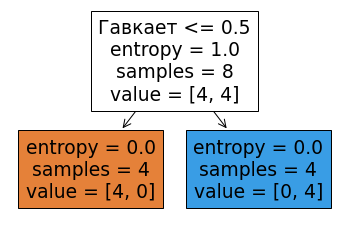

In [2]:
dogs = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs.csv", index_col=1)

dogs_X = dogs.iloc[:, :3]
dogs_y = dogs.iloc[:, 3]

dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(dogs_X, dogs_y)

tree.plot_tree(dogs_clf, filled=True, feature_names=dogs_X.columns)

In [ ]:
titanic_data = pd.read_csv('C:/Users/user/Downloads/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = titanic_data.drop(['PassengerId','Name','Cabin','Survived','Ticket'],axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age':X.Age.median()})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.score(X_test,y_test)

0.8203389830508474

In [ ]:
max_depth_values = range(1,100)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
        clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
        clf.fit(X_train,y_train)
        train_score = clf.score(X_train,y_train)
        test_score = clf.score(X_test,y_test)
        
        mean_cross_val_score = cross_val_score(clf,X_train,y_train,cv=5).mean()
        temp_scores_data = pd.DataFrame({'max_depth':[max_depth],
                                         'train_score':[train_score],
                                         'test_score':[test_score],
                                        'mean_cross_val_score':[mean_cross_val_score]})
        
        scores_data = scores_data.append(temp_scores_data,ignore_index=True)

In [ ]:
scores_data.shape

(99, 4)

In [ ]:
scores_data_long.query("set_type == 'mean_cross_val_score'").head(9)

,max_depth,set_type,score
198,1,mean_cross_val_score,0.781961
199,2,mean_cross_val_score,0.770196
200,3,mean_cross_val_score,0.790322
201,4,mean_cross_val_score,0.788627
202,5,mean_cross_val_score,0.802073
203,6,mean_cross_val_score,0.803754
204,7,mean_cross_val_score,0.795336
205,8,mean_cross_val_score,0.805406
206,9,mean_cross_val_score,0.802045


In [ ]:
scores_data_long = pd.melt(scores_data,id_vars=['max_depth'],
                           value_vars = ['train_score','test_score','mean_cross_val_score'],
                           var_name='set_type',
                          value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

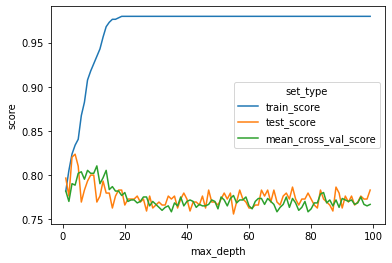

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [ ]:
iris_train = pd.read_csv('C:/Users/user/Downloads/train_iris.csv',index_col=0)
iris_test = pd.read_csv('C:/Users/user/Downloads/test_iris.csv',index_col=0)

In [ ]:
X_iris_train = iris_train.drop(['species'],axis=1)
y_iris_train = iris_train.species
X_iris_test = iris_test.drop(['species'],axis=1)
y_iris_test = iris_test.species
max_depth_values_iris = range(1,100)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

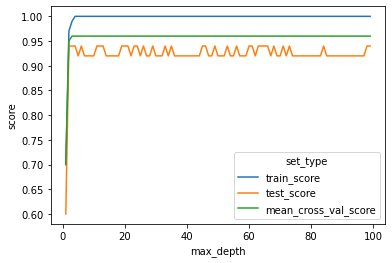

In [ ]:
scores_data_iris = pd.DataFrame()
np.random.seed(0)
for max_depth in max_depth_values_iris:
        clfr = tree.DecisionTreeClassifier( criterion = 'entropy', max_depth=max_depth)
        clfr.fit(X_iris_train,y_iris_train)
        train_score_iris = clfr.score(X_iris_train,y_iris_train)
        test_score_iris = clfr.score(X_iris_test,y_iris_test)
        mean_cross_val_score_iris = cross_val_score(clfr,X_iris_train,y_iris_train,cv=5).mean()

        temp_scores_iris = pd.DataFrame({'max_depth':[max_depth],
                                         'train_score':[train_score_iris],
                                         'test_score':[test_score_iris],
                                        'mean_cross_val_score':[mean_cross_val_score_iris]})
        scores_data_iris = scores_data_iris.append(temp_scores_iris,ignore_index=True)
scores_data_iris_long = pd.melt(scores_data_iris,id_vars=['max_depth'],
                           value_vars = ['train_score','test_score','mean_cross_val_score'],
                           var_name='set_type',
                          value_name='score')
sns.lineplot(x='max_depth', y='score', hue='set_type',data=scores_data_iris_long, style_order=False)

In [ ]:
animals = pd.read_csv('C:/Users/user/Downloads/dogs_n_cats.csv', index_col=0)
animals1 = pd.read_json('C:/Users/user/Downloads/dataset_209691_15 (3).txt')

In [ ]:
X_train_animals = animals.drop(['Вид'],axis=1)
y_train_animals = animals.Вид

In [ ]:
scores_animals = pd.DataFrame()
for max_depth in max_depth_values:
    cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
    cls.fit(X_train_animals, y_train_animals)
    score_train_animals = cls.score(X_train_animals, y_train_animals)
    mean_cross_val_animals = cross_val_score(cls, X_train_animals,y_train_animals,cv=5).mean()
    df = pd.DataFrame({'max_depth' :[max_depth],
                     'train_score': [score_train_animals],
                     'cross_score': [mean_cross_val_animals]})
    scores_animals = scores_animals.append(df, ignore_index=True)
scores_animals

,max_depth,train_score,cross_score
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
...,...,...,...
94,95,1.0,1.0
95,96,1.0,1.0
96,97,1.0,1.0
97,98,1.0,1.0


In [ ]:
a = cls.predict(animals1.iloc[:,1:])
l = list(a)
l.count('собачка')

45